# Create game sequences for Keras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# import a set of customized fuctions 
from funzioniNN import *

Using TensorFlow backend.


Open the pickle file of all games for each players. We get the data saved in a pickle format and load it into the notebook.
    

In [5]:
!pwd

/home/jovyan/data_shared/students/LOL_FINAL/prediction_outcomes/League of Legends


In [6]:
pfile = "../data/"

In [7]:
X = pickle.load(open(pfile+'X_seq.pkl',"rb"))

This is how the file is shaped. It shows the sequence of actions for the first player in the first game.

In [8]:
X[0]

[(221, 471, []),
 (10292, 3086, ['ITEM_PURCHASED', 'ITEM_PURCHASED']),
 (12239, 2018, ['SKILL_LEVEL_UP']),
 (13433, 3235, ['SKILL_LEVEL_UP']),
 (10322, 1008, ['SKILL_LEVEL_UP', 'ITEM_DESTROYED', 'WARD_PLACED']),
 (10950,
  1658,
  ['ITEM_PURCHASED', 'ITEM_PURCHASED', 'ITEM_PURCHASED', 'SKILL_LEVEL_UP']),
 (13333, 2517, ['CHAMPION_KILL', 'ITEM_DESTROYED', 'SKILL_LEVEL_UP']),
 (10504, 1216, ['ITEM_PURCHASED', 'ITEM_DESTROYED']),
 (13732, 3890, ['CHAMPION_KILL', 'SKILL_LEVEL_UP', 'CHAMPION_KILL']),
 (11072, 1962, ['ITEM_PURCHASED', 'SKILL_LEVEL_UP', 'CHAMPION_KILL']),
 (12386, 2238, ['ITEM_PURCHASED']),
 (602,
  487,
  ['SKILL_LEVEL_UP',
   'CHAMPION_KILL',
   'ITEM_PURCHASED',
   'ITEM_DESTROYED',
   'ITEM_DESTROYED',
   'ITEM_DESTROYED']),
 (13371, 3234, ['WARD_PLACED', 'ITEM_DESTROYED']),
 (965,
  5067,
  ['SKILL_LEVEL_UP',
   'BUILDING_KILL',
   'ITEM_PURCHASED',
   'ITEM_PURCHASED',
   'ITEM_PURCHASED',
   'ITEM_PURCHASED',
   'ITEM_DESTROYED',
   'SKILL_LEVEL_UP',
   'SKILL_LEVEL_UP

Below are listed all possible events that can take place, while playing. That list is then turned into numerical values so that can be added to the sequence of positions in the game.

In [9]:
# Define all posssible action that players can take in each frame
allActions = ['BUILDING_KILL',
 'CHAMPION_KILL',
 'ELITE_MONSTER_KILL',
 'ITEM_DESTROYED',
 'ITEM_PURCHASED',
 'ITEM_SOLD',
 'ITEM_UNDO',
 'SKILL_LEVEL_UP',
 'WARD_KILL',
 'WARD_PLACED']

# Code the actions with numbers from 10001 to 100010
allmap = dict(zip(allActions, range(10001,10011)))
# Results / Legends
allmap

{'BUILDING_KILL': 10001,
 'CHAMPION_KILL': 10002,
 'ELITE_MONSTER_KILL': 10003,
 'ITEM_DESTROYED': 10004,
 'ITEM_PURCHASED': 10005,
 'ITEM_SOLD': 10006,
 'ITEM_UNDO': 10007,
 'SKILL_LEVEL_UP': 10008,
 'WARD_KILL': 10009,
 'WARD_PLACED': 10010}

### We store all the sequences into a list to check its features.

In [10]:
# Save in a list all the sequences
seq = []
for sequence in X:
    seq.append(sequence)

In [11]:
# The length of the list indicates the number of games evaluated
len(seq)

46350

The length of each game in the sequence indicated by the frames (*e.g. the duration of the game, since each frame corresponds to a minute of the game*).

In [10]:
# Since the len of the sequence is most likely to be the same 
seq = []
for sequence in X:
    seq.append(len(sequence))

The first game, in fact, lasted 38 minutes for all the participants (e.g. 10 players). The following game, as we would have expected, had different duration.

In [11]:
seq[0:11]

[38, 38, 38, 38, 38, 38, 38, 38, 38, 38, 28]

For instance, player 1, in the fifth minute of game 1 was in position (10950,1658) and did four actions, listed in square brackets.

In [12]:
X[0][5]

(10950,
 1658,
 ['ITEM_PURCHASED', 'ITEM_PURCHASED', 'ITEM_PURCHASED', 'SKILL_LEVEL_UP'])

**Create the final sequence** 
* statsLenSeq        -> *list having for elements the length of each sequence*  
* allSequences       -> *list with all the sequences of each game*
* Yseq               -> *vector with target variable* 
* control            -> *control check to be sure that Y and X are the same length*


In [13]:
statsLenSeq, allSequences, Yseq, control= create_Sequence(X=X,events=allmap, path = pfile)

**The plot below shows the frequencies of each game' sequences**

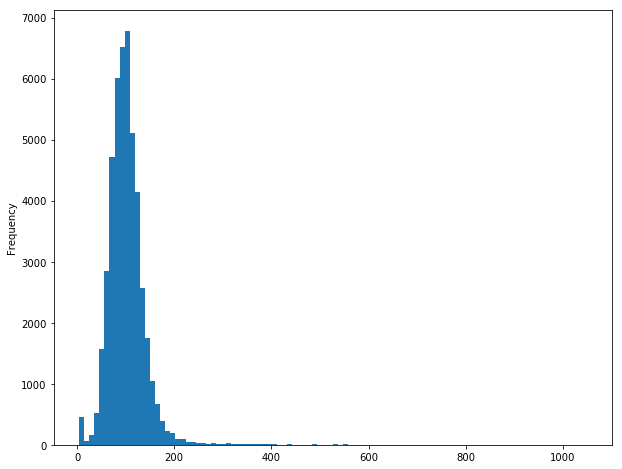

In [14]:
pd.Series(statsLenSeq).plot(kind='hist', bins = 100, figsize=(10,8))

Since the 99% of observations fall below 217, we could cut off the one percent being less informative. 

In [15]:
pd.Series(statsLenSeq).quantile(0.99)

217.0

# Analysis of movements across the map in games

In [16]:
# Calculating the differential pace for each game's frames 
allDx, allDy = getDifferantialPace(X=X)

Plot this difference.

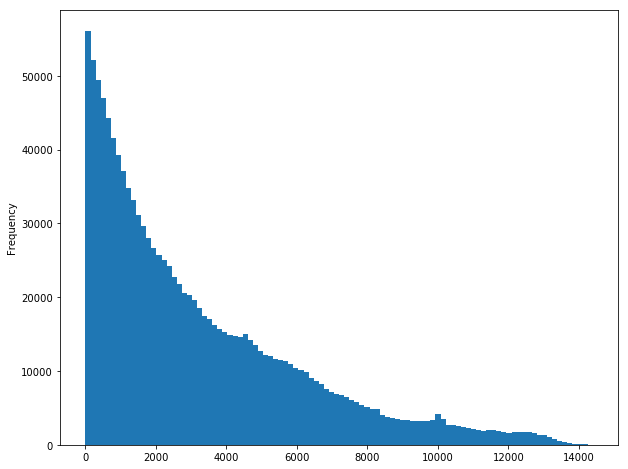

In [17]:
pd.Series(allDy).plot(kind='hist', bins = 100, figsize=(10,8))

In [32]:
print('The players, on average, move by %s.'%int(pd.Series(allDy).mean()))

The players, on average, move by 3227.


This results supports the choice of dividing the map in square in order to capture the 95% of all movements in the game with no loss in Informativeness of the model.

In [34]:
round(pd.Series(allDx).quantile(0.05),2)

155.0